# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# LOADING THE DATASET

In [75]:
ds=pd.read_csv('census_income.csv')
ds.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Top 5 heads of the dataset.

In [76]:
ds.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Bottom 5 of the dataset.

In [77]:
ds.shape

(32560, 15)

Total 32560 rows and 15 columns in the dataset.

# CHECKING TYPES OF DATA

In [78]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


6 integer data type columns and 9 object data type columns present in the dataset.

# CHECKING NULL VALUES

In [79]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values present in the dataset

<AxesSubplot:>

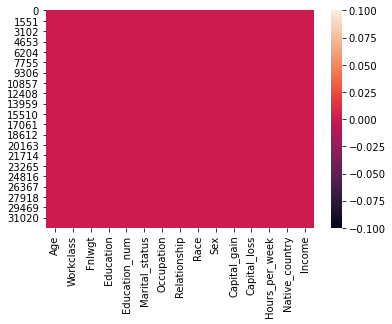

In [80]:
# checking null values through heatmap
sns.heatmap(ds.isnull())

heatmap is showing no null values.

# EXPLORATORY DATA ANALYSIS for categorical data

In [81]:
ds.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64


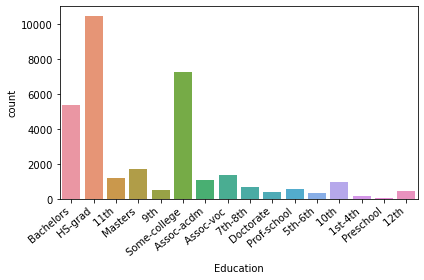

In [82]:
ax=sns.countplot(x='Education',data=ds)
print(ds['Education'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Most of the people are HS-grad and are maximum in numbers that is 10501.
very few peoples(51) have done Preschool and minimum in numbers. 

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64


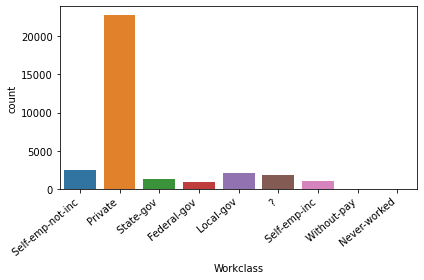

In [83]:
ax=sns.countplot(x='Workclass',data=ds)
print(ds['Workclass'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Peoples working in private comanies are maximum in numbers that is 22696,
other than that 'Self-emp-not-in', 'Local-gov', '?','State-gov', 'Self-emp-inc', and 'Federal-gov'are looking almost equal in plot 

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64


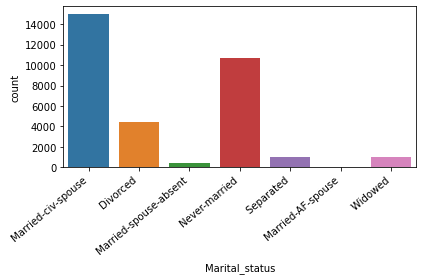

In [84]:
ax=sns.countplot(x='Marital_status',data=ds)
print(ds['Marital_status'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Married-civ-spouse are maximum in numbers that is 14976 ,Never-married peoples are 10682 and Divorced are 443.
Married-AF-spouse are very few in numbers that is 23

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64


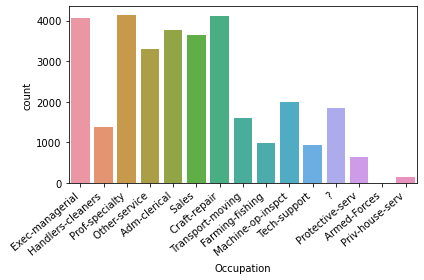

In [85]:
ax=sns.countplot(x='Occupation',data=ds)
print(ds['Occupation'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Prof-specialty , Craft-repair, Exec-managerial and Adm-clerical , Sales ,Other-service are almost equal in numbers and counplot is showing almost equally distribution their bars.

There is only 9 Armed-Forces.

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64


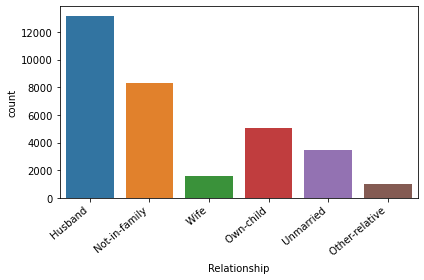

In [86]:
ax=sns.countplot(x='Relationship',data=ds)
print(ds['Relationship'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

13193 are husbands with maximum number of counts, 1568 are wives other relatives are 981 ,
Not-in-family, Own-child and Unmarried are approximately same.

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64


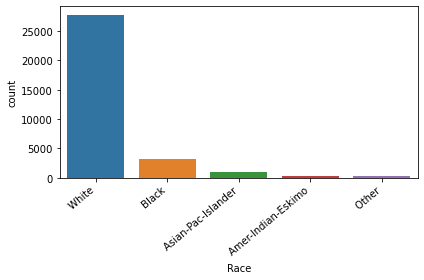

In [87]:
ax=sns.countplot(x='Race',data=ds)
print(ds['Race'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

WHite are maximum in numbers that is 27815 , other than that Black ,Asian-Pac-Islander are almost equal and Amer-Indian-Eskimo, and other are almost equal.

1    21789
0    10771
Name: Sex, dtype: int64


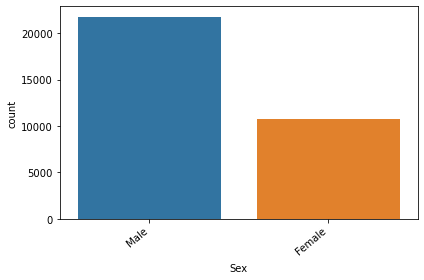

In [88]:
ax=sns.countplot(x='Sex',data=ds)
print(ds['Sex'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

The number of male is maximum that is 21789 and the number of female is 10771.

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: Native_country, dtype: int64


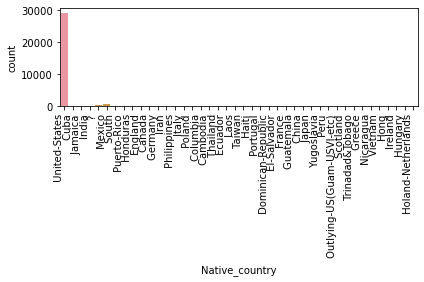

In [89]:
ax=sns.countplot(x='Native_country',data=ds)
print(ds['Native_country'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

The people from United-States are maximum in numbers that is 29169, peoples from other countries are not in noticable number indicating approximately same.

0    24719
1     7841
Name: Income, dtype: int64


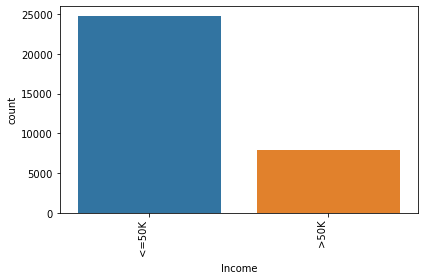

In [90]:
ax=sns.countplot(x='Income',data=ds)
print(ds['Income'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()

person makes over $50K a year are maximum in numbers that is 24719 and less than 50k is 7841 in numbers,
indicating imbalnced data.

# EXPLORATORY DATA ANALYSIS for numerical data

In [41]:
ds.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

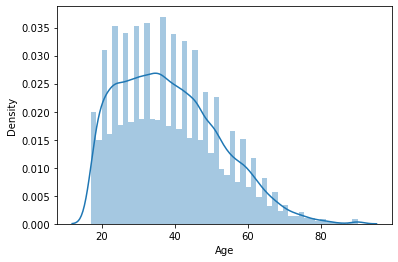

In [91]:
sns.distplot(ds['Age'])

Most of the ages are between 18 to approx 65 , and it is left skewed

In [92]:
#removing skewness
ds['Age']=np.log(ds['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

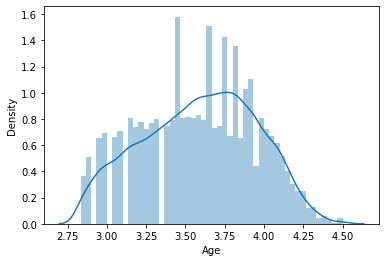

In [93]:
#plotting again
sns.distplot(ds['Age'])

Now it is somehow looking normally distributed.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

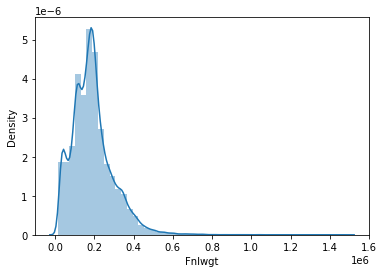

In [94]:
sns.distplot(ds['Fnlwgt'])

Fnlwgt is ranges in between 0.0 to 0.6 and it is left skewed.

In [95]:
#removing skewness
ds['Fnlwgt']=np.log(ds['Fnlwgt'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

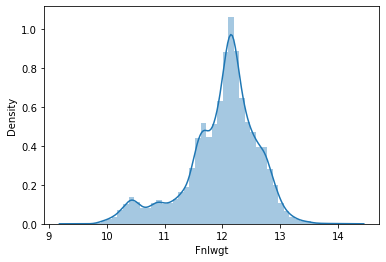

In [96]:
# plotting again
sns.distplot(ds['Fnlwgt'])

Now it is somehow looking normally distributed.

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

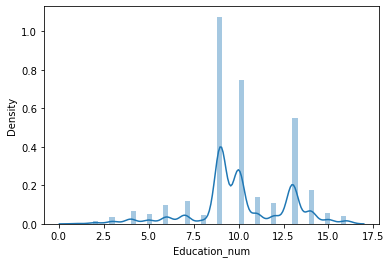

In [97]:
sns.distplot(ds['Education_num'])

Education_num is varrying.

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

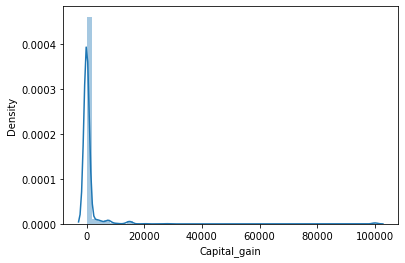

In [98]:
sns.distplot(ds['Capital_gain'])

Capital_gain is ranges from 0 to approx 20000 and it is left skewed and will remove skewness later.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

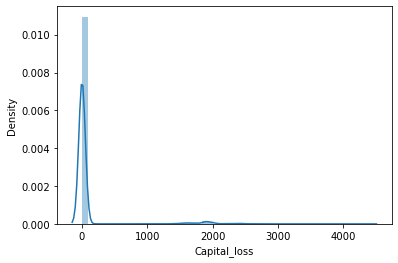

In [99]:
sns.distplot(ds['Capital_loss'])

Capital_loss ranges from 0 to somehow 2000 and it is left skewed.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

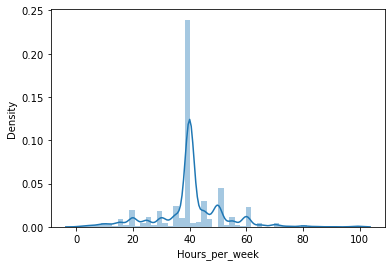

In [56]:
sns.distplot(ds['Hours_per_week'])

 Hours_per_week ranges from 0 to 100 and its looking normally distributed.

# BIVARIATE ANALYSIS

<AxesSubplot:title={'center':' comparison between capital gain and capital rate'}, xlabel='Capital_gain', ylabel='Capital_loss'>

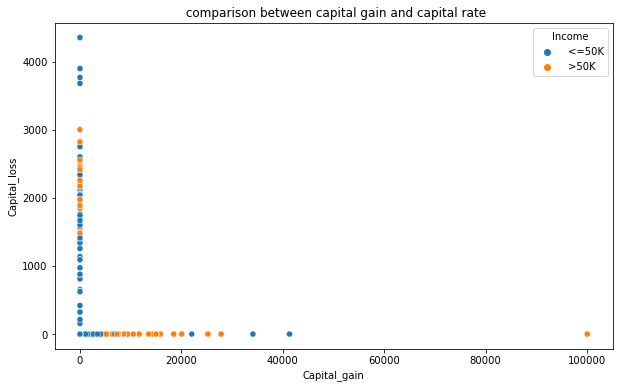

In [100]:
plt.figure(figsize=[10,6])
plt.title(' comparison between capital gain and capital rate')
sns.scatterplot(ds['Capital_gain'], ds['Capital_loss'],hue=ds['Income'])

Scatterplot is showing Capital gain is more tham capital loss.

<AxesSubplot:xlabel='Income', ylabel='count'>

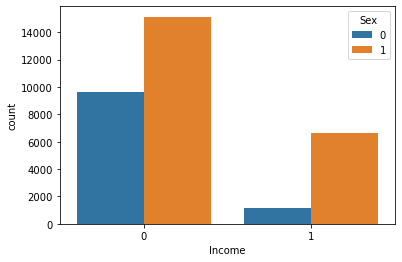

In [136]:
sns.countplot(ds['Income'], hue='Sex',data=ds)

Male is less than the female for above 50k .

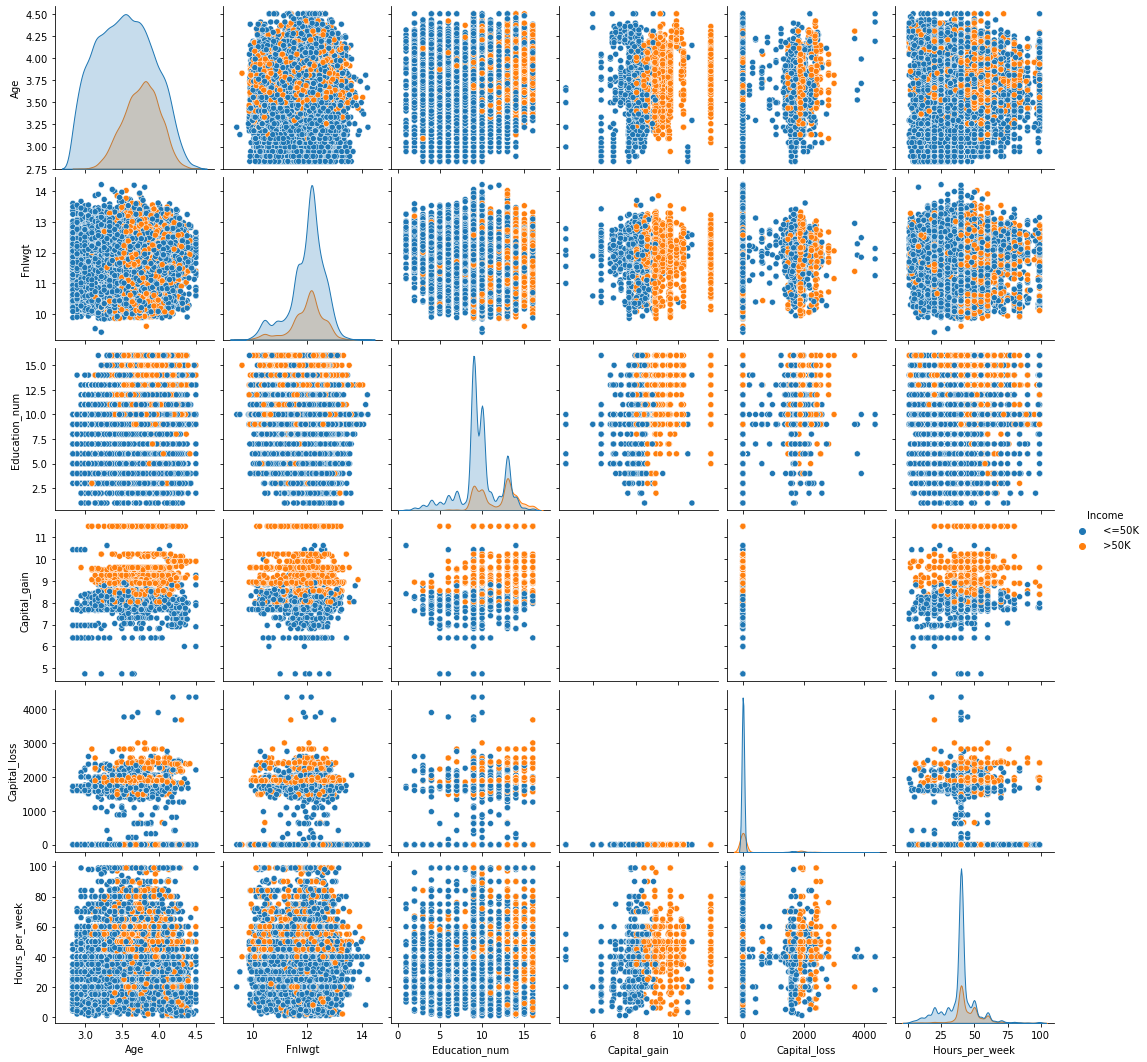

In [66]:
# PAIRPLOT

sns.pairplot(ds, hue='Income')

Pairplot is showing comparison among each of the model

# CONVERTING STRING COLUMNS TO NUMERIC COLUMNS

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [101]:
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=le.fit_transform(ds[i])

In [102]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


object datatype columns has been converted into numeric columns.

# CHECKING OUTLIERS

Age                   AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Workclass          AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Fnlwgt             AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Education          AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Education_num      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Marital_status     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Occupation         AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Relationship         AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Race              AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Sex               AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
Capital_gain      AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
Capital_loss      AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
Hours_per_week    AxesSubplot(0.692073,0.518913;0.0945122x0.16413)
Native_country    AxesSubplot(0.805488,0.518913;0.0945122x0.16413)
Income               AxesSubplot(0.125,0.321957;0.0945122x0.16

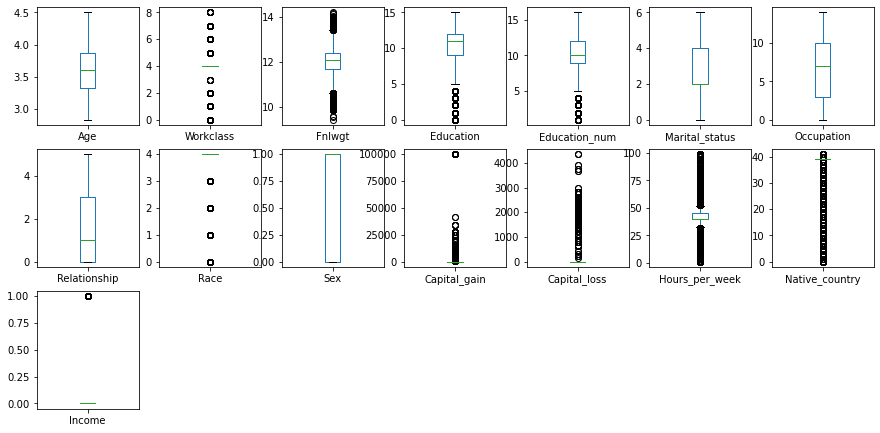

In [103]:
ds.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Workclass, Education and Native_country is the object data type columns with outliers and in object data type we cant remove outliers due to chances of data loss.

So, outliers are present in integer data type columns that is Education_num , Capital_loss, Hours_per_week.

# CHECKING SKEWNESS

In [104]:
ds.skew()

Age               -0.131709
Workclass         -0.752280
Fnlwgt            -0.842578
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:
    
    Workclass 
    
    Fnlwgt
    
    Education
    
    Relationship 
    
    Race
    
    Sex
    
    Capital_gain 
    
    Capital_loss
    
    Native_country
    
    Income
    
    
    

and workclass .FNlwgt ,Education, Relationship .Race ,Sex, Native_country and Income is the object column so skewness wont be treated .

# STATISTICAL SUMMARY

In [105]:
ds.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.589357,3.868796,11.983792,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,0.360384,1.455879,0.630741,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,2.833213,0.000000,9.416134,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.332205,4.000000,11.677011,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,3.610918,4.000000,12.091576,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,3.871201,4.000000,12.376045,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,4.499810,8.000000,14.210727,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

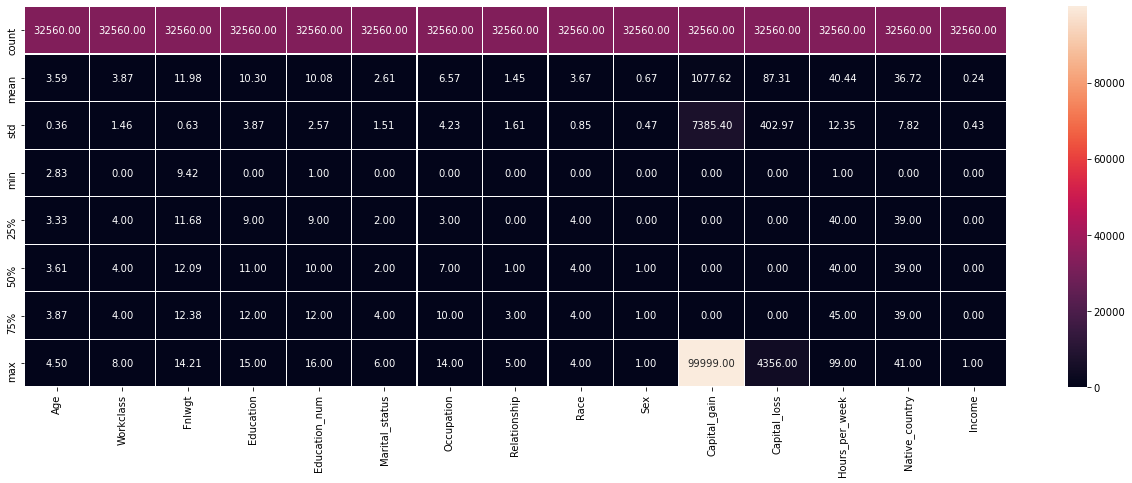

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(ds.describe(),annot=True,linewidths =0.1,fmt='0.2f')

Number of count is same in all the columns.

In capital gain and capital loss columns median is 0 and mean is very high means outliers are present.

In capital gain and capital loss columns 75th percentile is 0 and max is very high.





# CORRELATION MATRIX

In [108]:
cor=ds.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030558,-0.058228,0.010682,0.075086,-0.324965,-0.007277,-0.286549,0.021285,0.104628,0.081237,0.063278,0.140727,-0.007157,0.269109
Workclass,0.030558,1.000000,-0.014834,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.058228,-0.014834,1.000000,-0.028743,-0.037547,0.025856,0.003209,0.011113,-0.009088,0.019362,0.003569,-0.005092,-0.024335,-0.059969,-0.001393
Education,0.010682,0.023537,-0.028743,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.075086,0.052015,-0.037547,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.324965,-0.064798,0.025856,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.007277,0.255004,0.003209,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.286549,-0.090449,0.011113,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.021285,0.049720,-0.009088,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.104628,0.095942,0.019362,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

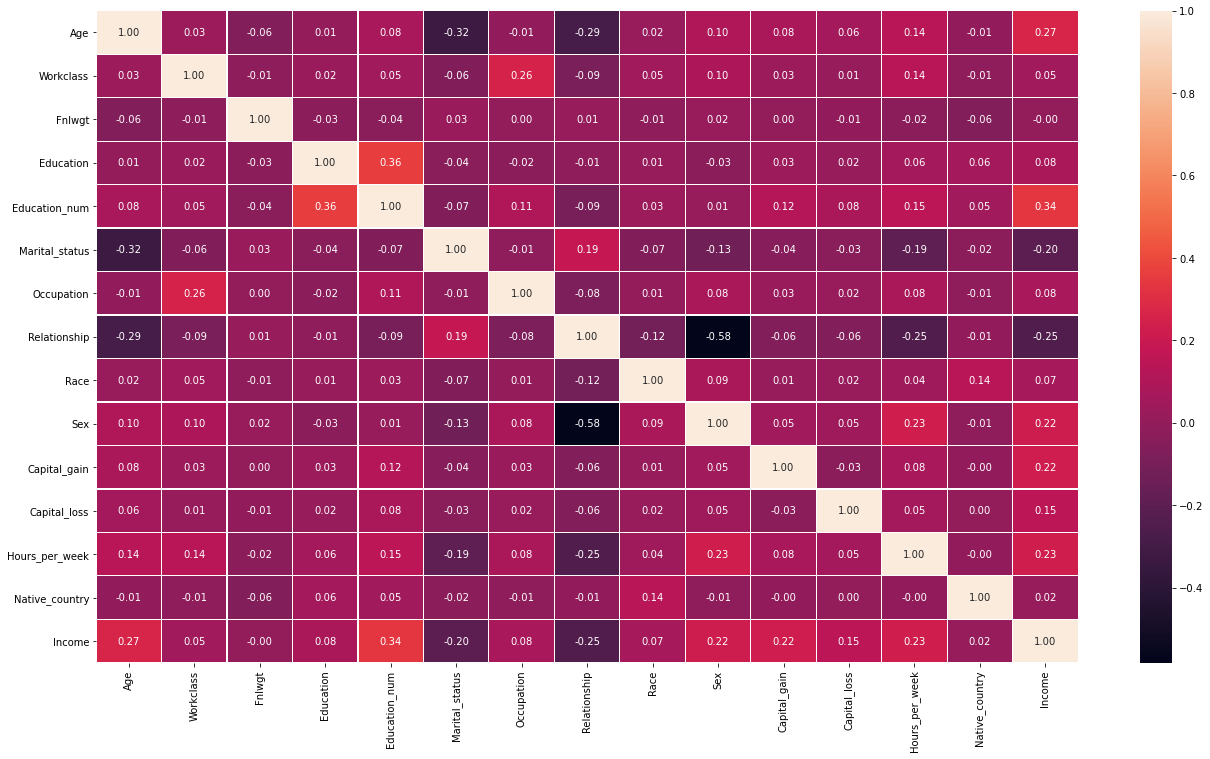

In [109]:
plt.figure(figsize=(22,12))
sns.heatmap(ds.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Age and Education_num is somehow positively correlated with the target  column Income, and no other column is showing any good correlation with target column.

Sex is negatively correlated with Relationship.

Education is somehpow positively correlated with Education_num. 

# FILLING ? VALUES

In [137]:
# because we dont know what exactly ? is.

In [141]:
ds['Workclass']=ds['Workclass'].replace('?','Private')
ds['Occupation']=ds['Occupation'].replace('?','Prof-specialty')
ds['Native_country']=ds['Native_country'].replace('?','United-States')



In [142]:
ds

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
3,3.332205,4,12.732011,9,13,2,10,5,2,0,0,0,40,5,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [143]:
ds.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# REMOVING OUTLIER AND SKEWNESS

In [220]:
ds.shape

(32560, 15)

In [221]:
from scipy.stats import zscore

In [222]:
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [223]:
dataframe=ds[(z<3).all(axis=1)]
dataframe

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.912023,6,11.330336,9,13,2,4,0,4,1,0,0,13,39,0
1,3.637586,4,12.281393,11,9,0,6,1,4,1,0,0,40,39,0
2,3.970292,4,12.366153,1,7,2,6,0,2,1,0,0,40,39,0
4,3.610918,4,12.558777,12,14,2,4,5,4,0,0,0,40,39,0
5,3.891820,4,11.984097,6,5,3,8,1,2,0,0,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,3.295837,4,12.458006,7,12,2,13,5,4,0,0,0,38,39,0
32556,3.688879,4,11.947134,11,9,2,7,0,4,1,0,0,40,39,1
32557,4.060443,4,11.931044,11,9,6,1,4,4,0,0,0,40,39,0
32558,3.091042,4,12.213495,11,9,4,1,3,4,1,0,0,20,39,0


In [224]:
ds.shape

(32560, 15)

In [226]:
dataframe.shape

(27688, 15)

In [227]:
dataframe.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

4872 rows has been removed as a outlier

In [228]:
# Checking skewness
dataframe.skew()

Age               -0.118378
Workclass         -0.741752
Fnlwgt            -0.807884
Education         -0.955367
Education_num     -0.148775
Marital_status    -0.040698
Occupation         0.132987
Relationship       0.750075
Race              -2.555541
Sex               -0.686102
Capital_gain       4.941962
Capital_loss      29.470795
Hours_per_week    -0.364846
Native_country    -5.396104
Income             1.327831
dtype: float64

In [239]:
dataframe['Capital_loss']=np.cbrt(dataframe['Capital_loss'])

In [240]:
dataframe.skew()

Age               -0.118378
Workclass         -0.741752
Fnlwgt            -0.807884
Education         -0.955367
Education_num     -0.148775
Marital_status    -0.040698
Occupation         0.132987
Relationship       0.750075
Race              -2.555541
Sex               -0.686102
Capital_gain       4.941962
Capital_loss      24.746335
Hours_per_week    -0.364846
Native_country    -5.396104
Income             1.327831
dtype: float64

Some of the skewness has been removed during outlier removal , tried removing more skewness but loosing tht data.

# SEPRATING THE COLUMNS INTO X AND Y

In [241]:
x=dataframe.drop('Income',axis=1)
y=dataframe['Income']

In [242]:
x.shape

(27688, 14)

In [243]:
y.shape

(27688,)

# Lets bring all features to a common scale

In [283]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(dataframe)

x=pd.DataFrame(x,columns=dataframe.columns)

 # HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [271]:
# In Target column Differece is more between above50k and less than 50k

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)


In [272]:
y_over.value_counts()

0    21501
1    21501
Name: Income, dtype: int64

# TRAIN TEST SPLIT

In [273]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21596, 15)
(6092, 15)
(21596,)
(6092,)


# MODEL BUILDING

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [275]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [276]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cv score is 100% of Logistic Reression.

In [277]:
# AUC ROC CURVE Logistic Regression
lr.fit(x_train,y_train)
y_pred_proba=lr.predict_proba(x_test)[:,1]

In [278]:
y_pred_proba

array([1.54414555e-04, 8.93599344e-05, 9.99476002e-01, ...,
       1.47442544e-04, 9.99505174e-01, 6.77165521e-05])

In [279]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
fpr
tpr

array([0.00000000e+00, 7.58725341e-04, 1.00000000e+00, 1.00000000e+00])

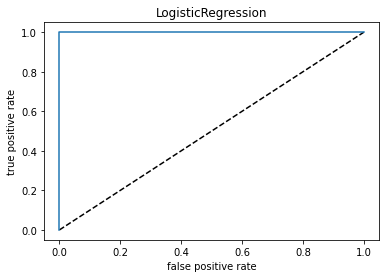

In [280]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('LogisticRegression')
plt.show()

In [281]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

1.0


Auc_score of Logistic Regression is 100%.

In [282]:
# AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [257]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cv score is 100% of adaboost classifier.

In [258]:
# AUC ROC CURVE adaboost classifier
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]


In [259]:
y_pred_prob

array([2.22044605e-16, 2.22044605e-16, 1.00000000e+00, ...,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16])

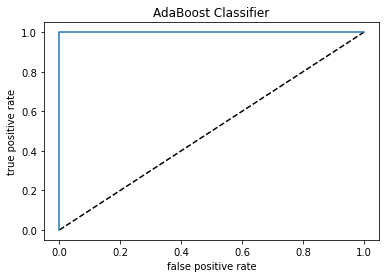

In [260]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show()

Auc_score of Adaboost Classifier is 100%.

In [261]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [262]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cross validation score is 100% for Decision Tree classifier.

In [265]:
# AUC ROC CURVE DECISION TREE CLASSIFIER
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]


In [266]:
y_pred_prob

array([0., 0., 1., ..., 0., 1., 0.])

In [267]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0., 1., 1.])

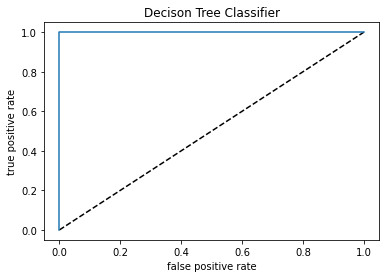

In [268]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decison Tree Classifier')
plt.show()

In [269]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

1.0


Auc_score of Decision Tree Classifier is 100%.

In [270]:
# RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [284]:
# Random FOrest Cross Validation

scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cv score is 100% of Random Forest Classifier.

In [285]:
# AUC ROC CURVE RANDOM FOREST CLASSIFIER
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]


In [286]:
y_pred_prob

array([0.  , 0.  , 1.  , ..., 0.02, 0.95, 0.  ])

In [287]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.        , 0.50758725, 0.69499241, 0.79210926, 0.84370258,
       0.88088012, 0.91350531, 0.93778452, 0.97116844, 0.97723824,
       0.98103187, 0.98406677, 0.98861912, 0.99241275, 0.9969651 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

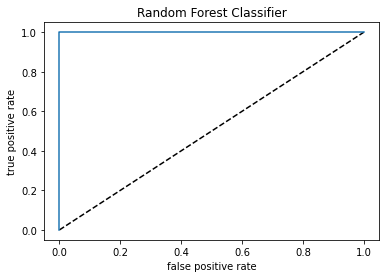

In [288]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [289]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print(auc_score)

1.0


Auc_score of Random Forest Classifier is 100%.

In [290]:
# GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

1.0
[[4774    0]
 [   0 1318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [291]:
# For GaussianNB cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 1.0


Accuracy score is 100% and cv score is 100% for gaussianNB.

In [292]:
# AUC ROC CURVE GAUSSIANNB
gnb.fit(x_train,y_train)
y_pred_prob=gnb.predict_proba(x_test)[:,1]


In [293]:
y_pred_prob

array([0., 0., 1., ..., 0., 1., 0.])

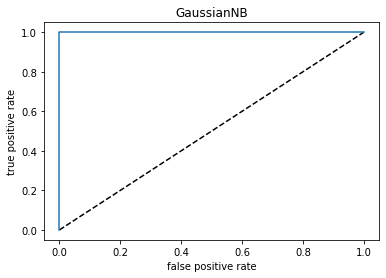

In [294]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('GaussianNB')
plt.show()

In [295]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
print(auc_score)

1.0


Auc_score of GaussianNB is 100%.

In [296]:
# SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9998358502954695
[[4774    0]
 [   1 1317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      6092
   macro avg       1.00      1.00      1.00      6092
weighted avg       1.00      1.00      1.00      6092



In [297]:
# SVC cross validation

scr=cross_val_score(svc,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.9998916576381365


Accuracy Score is 99% and cv score is 99% of SVC.

 # HYPER PARAMETER TUNING OF MODEL

In [301]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(max_depth=10,random_state=0)

grid_param={'criterion':['gini','entropy']}
           

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'gini'}
1.0


if criterion will be gini , then we will gel almost 100% accuracy after hyper parameter tuning.

In [302]:
final_mod=RandomForestClassifier(criterion='gini')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


After Hyper parameter tuning the accuracy score is 100%.

# SAVING THE MODEL

In [303]:
import pickle
filename='census_income.pkl'
pickle.dump(rf, open(filename, 'wb'))

# CONCLUSION

Above predictions from the model , we can say that our model is performing extremly well, we are getting  100% accuracy .

With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​